In [27]:
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import math
%matplotlib inline

In [3]:
sample =np.random.normal(5, 8,900)

In [32]:
#Bayesian Cognitive Modeling 4.1 example inferring mean and standard deviation from hypothetical data
with pm.Model() as model_four_one:
    mu = pm.Normal('mu',mu=0, tau=.001)
    sigma = pm.Uniform('sigma', lower = 0, upper=10)
    lam = 1/sigma**2
    dist = pm.Normal('dist', mu=mu, tau=lam, observed = sample)

In [33]:
with model_four_one:
    trace_four_one = pm.sample(samples=100000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, mu]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:02<00:00, 905.28draws/s] 
/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


Text(0.5,1,'Histogram of Mean and Sd')

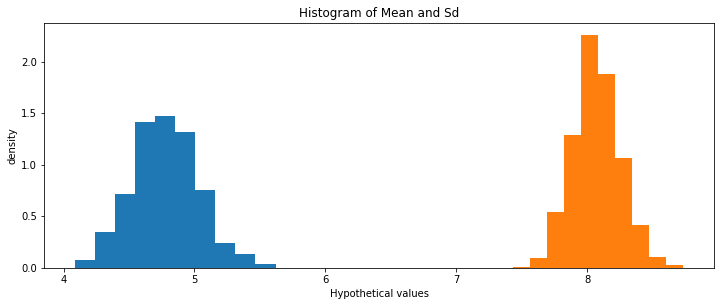

In [34]:
figsize(12,4.5)
sigma = trace_four_one['sigma']
mu = trace_four_one['mu']
plt.hist(mu, density=1)
plt.hist(sigma, density=1)
plt.xlabel('Hypothetical values')
plt.ylabel('density')
plt.title('Histogram of Mean and Sd')

In [8]:
import seaborn as sns

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


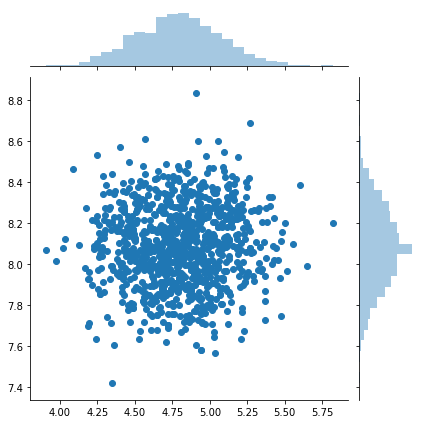

In [9]:
#assessing relation between mu and sigma
sns.jointplot(x=mu, y=sigma)

In [35]:
#Bayesian Cognitive Modeling 4.2 "Seven Scientists"
import theano.tensor as T
num_scientists = 7
data = [-27.02, 3.57, 8.191, 9.898, 9.603, 9.45, 10.056]
with pm.Model() as seven_scientists_model:
    #assume true mean of measurements is the same across scientists
    mu = pm.Normal('mu', mu=0, tau = .001)
    lambdas = np.zeros(num_scientists)
    for i in range(0,num_scientists):
        #individual standard deviations for each scientist allow measurements and distributions to vary
        name = 'lambda'+str(i)
        lambdas = pm.Gamma(name, alpha=.001, beta=.001)
        dist = 'dist' + str(i)
        pm.Normal(dist, mu, sd = lambdas, observed= data[i])

In [36]:
with seven_scientists_model:
   seven_scientists_trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [lambda6, lambda5, lambda4, lambda3, lambda2, lambda1, lambda0, mu]
Sampling 2 chains: 100%|██████████| 21000/21000 [01:31<00:00, 229.10draws/s]
/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
There were 2618 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6199092016546699, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2686 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probabili

In [57]:
num_scientists = 7
scientist_lambdas = [[],[],[],[],[],[],[],[]]
for i in range(0,num_scientists):
    lambda_scientist_str = 'lambda'+str(i)
    scientist_lambdas[i]=seven_scientists_trace[lambda_scientist_str]
mu = seven_scientists_trace['mu']

array([ 9.86034915,  9.84347322,  9.90744286, ..., 10.05781183,
       10.05781183, 10.05781183])

Text(0.5,1,'histogram of posterior density distribution of mu')

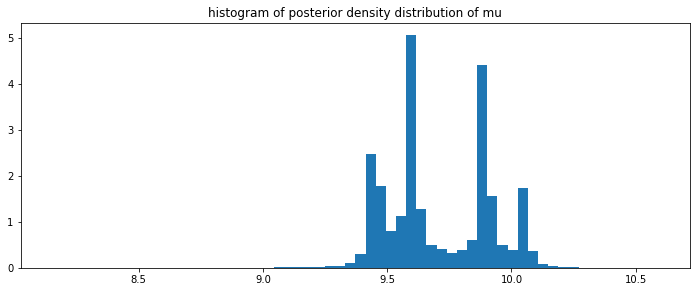

In [40]:
plt.hist(mu, bins=60, density=1)
plt.title('histogram of posterior density distribution of mu')

(0, 1000)

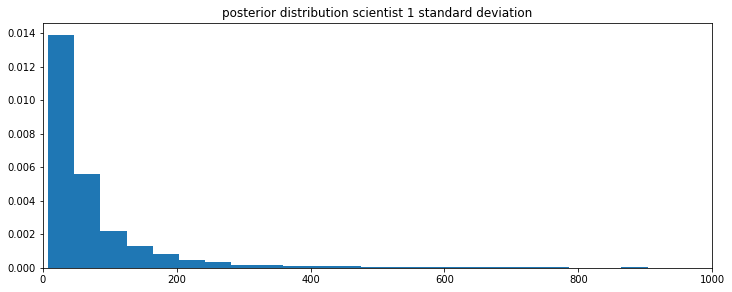

In [82]:
plt.hist(scientist_lambdas[0], bins=100, density=1) 
plt.title('posterior distribution scientist 1 standard deviation')
plt.xlim(0,1000)

(0, 1000)

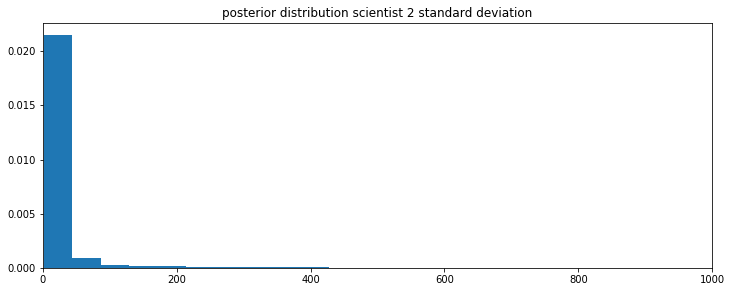

In [83]:
#plot respective density distributions for scienst
plt.hist(scientist_lambdas[1], bins=100, density=1) 
plt.title('posterior distribution scientist 2 standard deviation')
plt.xlim(0,1000)

(0, 1000)

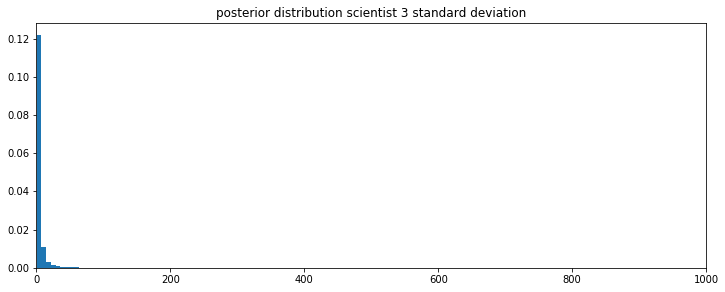

In [84]:
plt.hist(scientist_lambdas[2], bins=100, density=1) 
plt.title('posterior distribution scientist 3 standard deviation')
plt.xlim(0,1000)

(0, 1000)

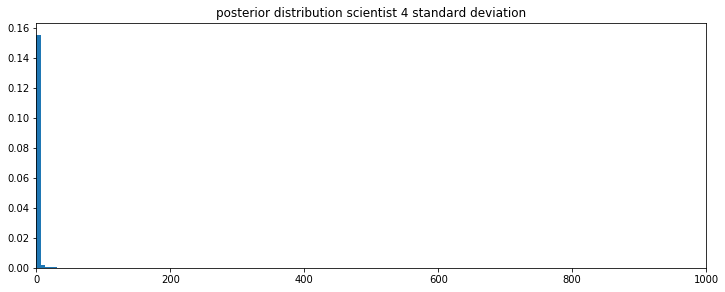

In [85]:
plt.hist(scientist_lambdas[3], bins=100, density=1) 
plt.title('posterior distribution scientist 4 standard deviation')
plt.xlim(0,1000)

(0, 1000)

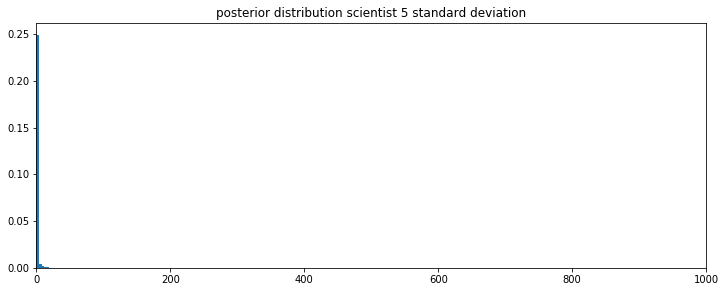

In [86]:
plt.hist(scientist_lambdas[4], bins=100, density=1) 
plt.title('posterior distribution scientist 5 standard deviation')
plt.xlim(0,1000)

(0, 1000)

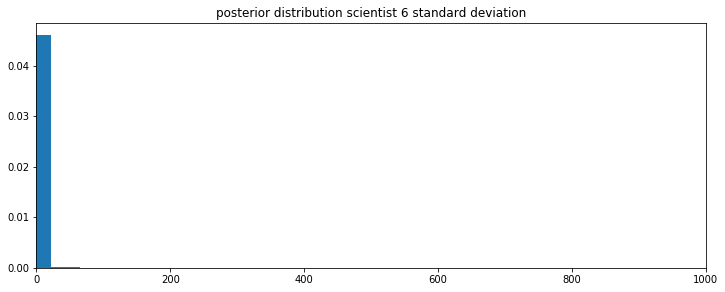

In [87]:
plt.hist(scientist_lambdas[5], bins=100, density=1) 
plt.title('posterior distribution scientist 6 standard deviation')
plt.xlim(0,1000)

(0, 1000)

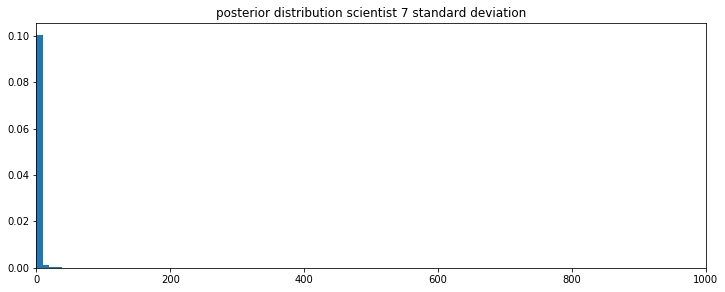

In [88]:
plt.hist(scientist_lambdas[6], bins=100, density=1) 
plt.title('posterior distribution scientist 7 standard deviation')
plt.xlim(0,1000)
#given the vastly narrower distributions of the latter 5 scientists we get the intuitive answer that
#the first two scientists to do likely do not offer reliable measurements



In [78]:
#Example 4.3 use iqs as an example of repeated measures to infer underlying
#"true" score on iq test - this is of course not a measure of intelligence but merely a quantified context specific
#measurement of how well someone does a set of arbitary tasks design by wealth white people that other wealth white
#people do well and which also correlates (decently) well with other task arbitrarily defined as relating to intellgience
with pm.Model() as repeated_iq_model:
    sigma = pm.Uniform('sigma', upper=100, lower=0)
    mu_1 = pm.Uniform('mu1', upper=300, lower=0)
    mu_2 = pm.Uniform('mu2', upper=300, lower=0)
    mu_3 = pm.Uniform('mu3', upper=300, lower=0)
    norm1 = pm.Normal('person_1', mu=mu_1, sd=sigma, observed=[94,95,96,])
    norm2 = pm.Normal('person_2', mu=mu_2, sd=sigma, observed=[109,110,111])
    norm3 = pm.Normal('person_3', mu=mu_3, sd=sigma, observed=[154,155,156])
    
    
    

In [79]:
with repeated_iq_model:
    repeated_iq_trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu3, mu2, mu1, sigma]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:34<00:00, 610.29draws/s]
/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


Text(0.5,1,'posterior distributions of each persons iq given observed data and model ')

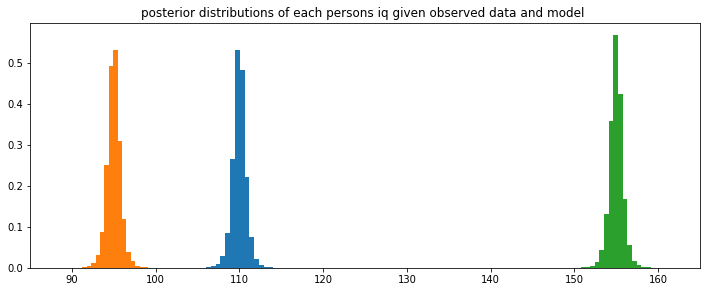

In [81]:
density =1
plt.hist(repeated_iq_trace['mu2'], bins=30, density=density)
plt.hist(repeated_iq_trace['mu1'], bins=30, density=density)
plt.hist(repeated_iq_trace['mu3'], bins=30, density=density)
plt.title('posterior distributions of each persons iq given observed data and model ')